In [73]:
# Import required libraries
import os
import requests
import json
import pandas as pd
# Import hvplot.pandas
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime
import numpy as np
import numpy.random as rnd
import requests
from MCForecastTools import MCSimulation
import ipywidgets as widgets
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline

In [74]:
# Load the environment variables from the .env file
# Call the load_dotenv function
load_dotenv()

True

In [75]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
            alpaca_api_key,
            alpaca_secret_key,
            api_version = "v2")

In [76]:
# Can allow user defined with IPY Widgets 
# widgets.Dropdown(options=["AGG", "SPY", "XLF", "QQQ", "EEM", "XLE", "GDX", "IWM", "IWV"], description="Select ETF")

ui= widgets.SelectMultiple(
            options=["AGG", "SPY", "XLF", "QQQ", "EEM", "XLE", "GDX", "IWM", "IWV"],
            value=['AGG'],
            description='Select ETFs for analysis',
            readout= True,
            disabled=False
)
display(ui)

SelectMultiple(description='Select ETFs for analysis', index=(0,), options=('AGG', 'SPY', 'XLF', 'QQQ', 'EEM',…

In [77]:
ui= list(ui.value)
print(ui)

['AGG']


In [78]:
timeframe = "1D"

today = str(datetime.datetime.today()).split()[0]

three_years_ago= str(datetime.datetime.today()- datetime.timedelta(days=1095)).split()[0]

start_date= pd.Timestamp(three_years_ago, tz="America/New_York").isoformat()

end_date= pd.Timestamp(today, tz="America/New_York").isoformat()
                       
limit_rows=1000
# Can allow user defined with IPY Widgets above 
tickers = ui

In [79]:
print("Preparing 3 years of historical data... Please wait")
alpaca_df= alpaca.get_barset(
               tickers,
               timeframe,
               limit= limit_rows,
               start = start_date,
               end = end_date
).df
display(alpaca_df.head())
display(alpaca_df.tail())

Preparing 3 years of historical data... Please wait


AGG                                   
                             open     high     low    close   volume
time                                                                
2018-08-17 00:00:00-04:00  106.43  106.545  106.38  106.460  1915186
2018-08-20 00:00:00-04:00  106.59  106.680  106.53  106.650  2105513
2018-08-21 00:00:00-04:00  106.58  106.620  106.51  106.575  2596721
2018-08-22 00:00:00-04:00  106.66  106.710  106.57  106.660  1725557
2018-08-23 00:00:00-04:00  106.67  106.705  106.62  106.620  1346950

AGG                                     
                             open      high       low   close   volume
time                                                                  
2021-08-10 00:00:00-04:00  115.65  115.6500  115.4350  115.44  6692325
2021-08-11 00:00:00-04:00  115.46  115.7000  115.3400  115.55  6423130
2021-08-12 00:00:00-04:00  115.49  115.5799  115.4000  115.54  4248390
2021-08-13 00:00:00-04:00  115.65  115.9700  115.6401  115.97  4455924
2021-08-16 00:00:00-04:00  116.14  116.2700  116.0300  116.03  3406963

In [80]:
# Set number of simulations
# Use IPY Widgets to set sims and years
#int_slider = widgets.IntSlider(min=50, max=500, value=25, step=10, description="Simulations?")
#int_slider

In [81]:
#simulations = int_slider.value
#print(simulations)

In [82]:
#int_slider = widgets.IntSlider(min=1, max=10, value=25, step=1, description="Years?")
#int_slider

In [83]:
#years = int_slider.value
#print(years)

In [84]:
simulations= widgets.Select(
    options=['50','100', '250', '500'],
    value='100',
    description='num of simulations',
    disabled=False
)
display(simulations)

Select(description='num of simulations', index=1, options=('50', '100', '250', '500'), value='100')

In [85]:
simulations=int(simulations.value)
print(simulations)

100


In [86]:
years=widgets.IntSlider(
    value=10,
    min=1,
    max=30,
    step=1,
    description='Years:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

display(years)

IntSlider(value=10, continuous_update=False, description='Years:', max=30, min=1)

In [87]:
years= int(years.value)
print(years)

10


In [88]:
# set number of years and simulations from user inputs
MC_ETF = MCSimulation(
    portfolio_data = alpaca_df,
    num_simulation = simulations,
    num_trading_days = 252 * years
)

In [89]:
# Run Monte Carlo simulations to forecast one year daily returns
MC_ETF.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000483,0.999613,0.998433,0.997406,0.995497,0.995400,1.001982,1.002614,1.000854,0.996440,...,0.996811,1.005956,0.998073,1.000971,1.000138,1.000464,1.000007,1.001819,1.004348,0.997637
2,0.997396,0.988855,0.997518,0.996610,0.996860,0.996994,1.004711,0.999745,1.000377,0.995609,...,0.998651,0.998314,0.995973,0.998979,0.997097,0.999890,0.996454,1.004027,1.001328,0.995764
3,1.001325,0.981965,1.000610,0.993776,0.999678,0.999794,1.004192,1.003212,1.005846,0.991532,...,0.997267,0.992009,0.991420,0.997130,0.997697,1.003669,0.995723,1.006657,1.003714,0.993304
4,1.000685,0.984057,0.996499,0.990929,1.001900,1.004655,1.004246,0.996226,1.007580,0.992019,...,0.999641,0.993361,0.990596,0.993020,1.000761,1.002955,0.997768,1.005263,0.995728,0.988211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.358137,1.458323,1.203384,2.050036,1.112341,1.114755,1.433442,1.285308,1.658513,1.237306,...,1.123090,1.197631,1.046176,0.955759,1.112052,1.246217,1.404095,1.199460,1.639422,1.372617
2517,1.349513,1.448682,1.198011,2.062360,1.113841,1.111786,1.427469,1.282739,1.657189,1.235232,...,1.120920,1.200741,1.049901,0.960292,1.112190,1.248585,1.406652,1.204679,1.651131,1.369501
2518,1.342045,1.438325,1.197267,2.062599,1.115578,1.113596,1.419785,1.283482,1.654165,1.233803,...,1.114683,1.208928,1.050404,0.956322,1.111473,1.248854,1.401400,1.205107,1.637167,1.367038
2519,1.337816,1.438329,1.201049,2.079028,1.115356,1.113379,1.427946,1.281421,1.654256,1.239782,...,1.119572,1.213165,1.046676,0.953700,1.119451,1.252590,1.399807,1.207099,1.633144,1.364961


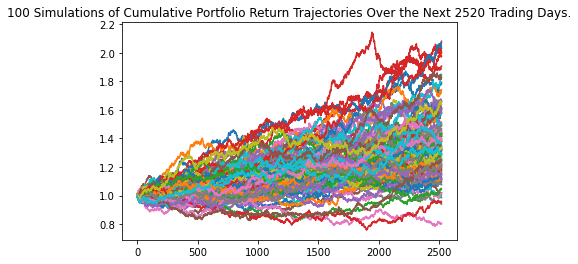

In [90]:
# Plot simulation outcomes
line_plot = MC_ETF.plot_simulation()

In [91]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_ETF.simulated_return.mean(axis=1)),
    "median": list(MC_ETF.simulated_return.median(axis=1)),
    "min": list(MC_ETF.simulated_return.min(axis=1)),
    "max": list(MC_ETF.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000089,1.000100,0.991642,1.009939
2,1.000212,1.000060,0.983329,1.015363
3,1.000446,1.000789,0.981965,1.018731
4,1.000288,1.000522,0.984057,1.021683
...,...,...,...,...
2516,1.365610,1.337010,0.801478,2.070446
2517,1.365610,1.338543,0.800480,2.065535
2518,1.364785,1.339218,0.802910,2.062599
2519,1.364491,1.334786,0.802577,2.079028


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of ETF Portfolio Over the Next Year'}>

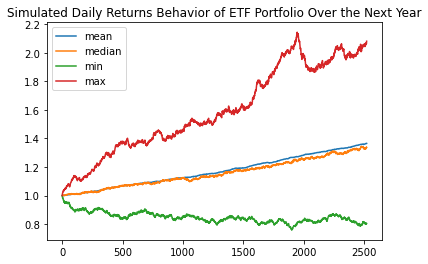

In [92]:
# Use the `plot` function to visually analyze the trajectory of AAPL stock daily returns on a 252 trading day simulation
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of ETF Portfolio Over the Next Year")

In [93]:
# Set initial investment
# Use widget to set investment amount
# widgets.Textarea(value="Please enter text here..")

In [94]:
investment=widgets.IntSlider(
    value=10,
    min=1000,
    max=1000000,
    step=1000,
    description='Investment:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

display(investment)

IntSlider(value=1000, continuous_update=False, description='Investment:', max=1000000, min=1000, step=1000)

In [95]:
investment = int(investment.value)
print(investment)

1000


In [96]:
# Set initial investment
initial_investment = investment

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
#cumulative_pnl

<AxesSubplot:title={'center':'Simulated Outcomes Behavior of ETF Stock Over the Next Year'}>

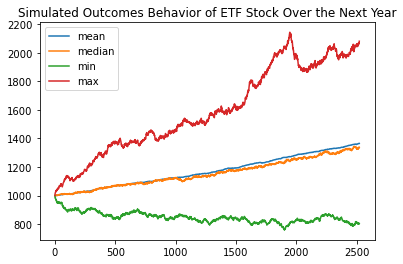

In [97]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title="Simulated Outcomes Behavior of ETF Stock Over the Next Year")

In [98]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ETF.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           100.000000
mean              1.364790
std               0.250019
min               0.804490
25%               1.197641
50%               1.336918
75%               1.473064
max               2.080963
95% CI Lower      0.968468
95% CI Upper      1.986824
Name: 2520, dtype: float64


In [100]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in ETF portfolio
# Bridge back to Widget for initial investment
ci_lower = tbl[8]* investment
ci_upper = tbl[9]* investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}.")

There is a 95% chance that an initial investment of $1,000.00 in the portfolio over the next year will end within in the range of $968.47 and $1,986.82.
